# Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
2. Сравните по производительности основные операции с массивами (array) numpy и с list

In [5]:
import numpy as np

min = -1.0
max = 2.0
count = 100
dummy = []

%timeit np.linspace(min, max, count)

%timeit [min + (max-min)*i/(count-1) for i in range(0, count-1)]

%timeit for i in range(0, count-1): dummy.append(min + (max-min)*i/(count-1))

22.5 µs ± 527 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
28.1 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
41.6 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
def linspace_generator(min, max, count):
    step = (max-min)/(count-1)
    while min<=max:
        yield min
        min += step
        
%timeit [x for x in linspace_generator(min, max, count)]

14.6 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
arra = np.array([1,2,3])
x = [1,2,3]

print("np.array\nlist\n")

print("#slice")
%timeit arra[:1]
%timeit x[:1]
print("\n")

print("#append")
%timeit np.append(arra, [4])
%timeit x.append(4)
print("\n")

print("#insert")
my_value = 0
pos = 0
%timeit np.insert(arra, pos, my_value)
%timeit x.insert(pos, my_value)
print("\n")

print("#delete")
pos = 0
%timeit np.delete(arra, pos, axis=0)
%timeit del x[pos]
print("\n")

np.array
list

#slice
273 ns ± 50 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
162 ns ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#append
12.7 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
152 ns ± 10.6 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#insert
19 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
210 ms ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#delete
14.4 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
197 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)




# Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
2. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
3. Сохраните рисунок в файл строчкой кода на Python

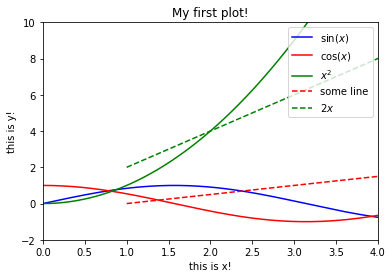

In [99]:
% matplotlib inline

from matplotlib import pylab as plt

x = np.linspace(0, 4, 1000)
plt.plot(x, np.sin(x), '-b', label=r'$\sin (x)$')
plt.plot(x, np.cos(x), '-r', label=r'$\cos (x)$')
plt.plot(x, x**2, '-g', label=r'$x^2$')
plt.plot([1, 3, 5, 7], range(4), '--r', label='some line')
plt.plot([1, 3, 5, 7], [z*2 for z in [1, 3, 5, 7]], '--g', label='$2x$')

plt.legend(loc="upper right")

plt.xlabel("this is x!")
plt.ylabel("this is y!")
plt.title("My first plot!")

plt.ylim(-2, 10)
plt.xlim(0, 4)

plt.savefig("D:\\My_first_plot!.pdf")
plt.show()

# Задание на Numpy+Matplotlib
1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

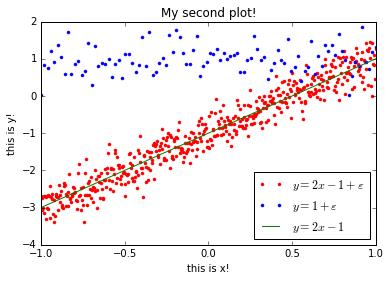

In [160]:
% matplotlib inline
from matplotlib import pylab as plt
import numpy as np
import math

# import matplotlib as mpl
# mpl.style.use('classic')
# print(mpl.rcParams['font.family'])

# mpl.rcParams['figure.figsize'] = [16.0, 12.0]
# mpl.rcParams['figure.dpi'] = 100

L = 500  # red
x = np.linspace(-1, 1, L)
y = 2 * x - 1 + math.sqrt(0.1) * np.random.randn(L)

M = 100  # blue
xx = np.linspace(-1, 1, M)
yy = 1 + math.sqrt(0.1) * np.random.randn(M)


plt.plot(x, y, '.r', label=r'$y = 2x - 1 + \varepsilon$')
plt.plot(xx, yy, '.b', label=r'$y = 1 + \varepsilon$')
plt.plot(x, 2 * x - 1, '-g', label=r'$y = 2x - 1$')

plt.legend(loc="lower right")

plt.xlabel("this is x!")
plt.ylabel("this is y!")
plt.title("My second plot!")

plt.show()

# Проверяем работу регуляризации в полиномиальной регрессии
1. Генерируем выборку для нашего примера
2. Делаем восстановление зависимости полиномом
3. Строим график восстановленной зависимости для разных C

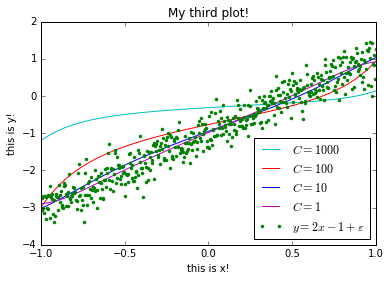

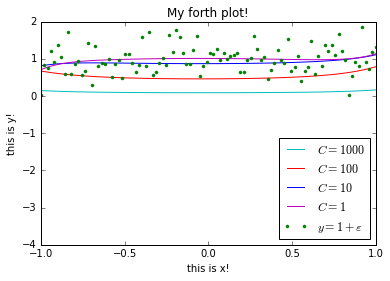

In [194]:
# выборка с предыдущего примера
from scipy.optimize import minimize


def poly(x, coeffs):
    return sum([coeffs[k] * x ** k for k in range(len(coeffs))])

def loss_function(coeffs):
    loss = 0.0
    loss += sum((poly(x, coeffs) - y) ** 2)    
    loss += C * sum((coeffs ** 2))
    return loss


init_coeffs = np.array([0.01] * 10)

C = 1000
result = minimize(loss_function, init_coeffs)
plt.plot(x, poly(x, result.x), '-c', label=r"$C = 1000$")

C = 100
result = minimize(loss_function, init_coeffs)
plt.plot(x, poly(x, result.x), '-r', label=r"$C = 100$")

C = 10
result = minimize(loss_function, init_coeffs)
plt.plot(x, poly(x, result.x), '-b', label=r"$C = 10$")

C = 1
result = minimize(loss_function, init_coeffs)
plt.plot(x, poly(x, result.x), '-m', label=r"$C = 1$")

plt.plot(x, y, '.g', label=r'$y = 2x - 1 + \varepsilon$')

plt.legend(loc="lower right")

plt.xlabel("this is x!")
plt.ylabel("this is y!")
plt.title("My third plot!")

plt.show()

#### Теперь для другой функции
def loss_function(coeffs):
    loss = 0.0
    loss += sum((poly(xx, coeffs) - yy) ** 2)    
    loss += C * sum((coeffs ** 2))
    return loss

C = 1000
result = minimize(loss_function, init_coeffs)
plt.plot(xx, poly(xx, result.x), '-c', label=r"$C = 1000$")

C = 100
result = minimize(loss_function, init_coeffs)
plt.plot(xx, poly(xx, result.x), '-r', label=r"$C = 100$")

C = 10
result = minimize(loss_function, init_coeffs)
plt.plot(xx, poly(xx, result.x), '-b', label=r"$C = 10$")

C = 1
result = minimize(loss_function, init_coeffs)
plt.plot(xx, poly(xx, result.x), '-m', label=r"$C = 1$")

plt.plot(xx, yy, '.g', label=r'$y = 1 + \varepsilon$')

plt.legend(loc="lower right")

plt.xlabel("this is x!")
plt.ylabel("this is y!")
plt.title("My forth plot!")

plt.ylim(-4, 2)
plt.xlim(-1, 1)

plt.show()


# Задачки на синтаксис (часть 1)
1. Сформируйте на основе этого массива словарь my_base, в котором по ключу в виде строки с телефоном абонента будет храниться другой словарь. Внутренний словарь по ключам в виде названий полей отзыва должен хранить значение полей (в виде строк). Например, код ниже должен выдать True: my_base['+7 916 000 00 01']['Дата'] == '20.05.2017' Обратите внимание, что вам могут немного мешать пробелы после знаков ":"
2. Попробуйте выполнить предыдущее задание, но теперь обеспечив хранение полей из отзыва в словаре в тех типах данных, которые на ваш взгляд наиболее уместны. Подумайте, что делать с датой и временем. Возможно вам покажется полезным немного воспользоваться поисковиком или документацией к Python, а может быть вам хватит стандартных типов данных. Объясните свой выбор в комментариях к коду или markdown ячейках и продемонстрируйте, что поля имеют нужный тип.
3. На лекции было рассказано про неизменяемые типы, в частности про tuple. Подумайте, можно ли "сломать" неизменяемость tuple? Как сделать tuple изменяемым? Можно ли будет его добавить в множество или использовать в качестве ключа в словаре?

In [12]:
reviews = ["""Телефон абонента: +7 916 000 00 01
Время: 10:34
Дата: 20.05.2017
Оценка: 1
Длительность разговора (мин.): 0:32
Комментарий: Общение с сотрудником вашей техподдержки мне не понравилось. Раньше всегда отвечала девушка с приятным голосом, а сегодня какой-то мужчина. Совсем никуда не годится, примите меры!!!""",
"""Телефон абонента: +7 916 000 00 02
Время: 9:20
Дата: 21.05.2017
Оценка: 5
Длительность разговора (мин.): 25:07
Комментарий: С моей проблемой мне помогли, большое спасибо!"""]

my_base = dict()

for rev in reviews:  # цикл по отзывам
    splitted_rev = rev.split('\n')
    
    # создаем словарь для отзыва
    temp = splitted_rev[0].split(': ')
    """ 
    в temp попадет лишь первая строчка (оттуда нужен номер телефона)
    
    ['Телефон абонента', '+7 916 000 00 01']
    ['Время', '10:34']
    ['Дата', '20.05.2017']
    ...
    """
    key = temp[1]  
    my_base[key] = dict()
    
    for s in splitted_rev[1:]:  # цикл по строкам внутри отзыва (после телефона)
        s_split = s.split(': ')  # разбили каждую строку key: value
        my_base[key][s_split[0]] = s_split[1]
    
print(my_base)
# s = ','.join(splitted)


{'+7 916 000 00 01': {'Время': '10:34', 'Дата': '20.05.2017', 'Оценка': '1', 'Длительность разговора (мин.)': '0:32', 'Комментарий': 'Общение с сотрудником вашей техподдержки мне не понравилось. Раньше всегда отвечала девушка с приятным голосом, а сегодня какой-то мужчина. Совсем никуда не годится, примите меры!!!'}, '+7 916 000 00 02': {'Время': '9:20', 'Дата': '21.05.2017', 'Оценка': '5', 'Длительность разговора (мин.)': '25:07', 'Комментарий': 'С моей проблемой мне помогли, большое спасибо!'}}


In [3]:
# "ломаем" tuple

a = [1, 2]
b = [3, 4]
c = (a, b)
print(c)

c[0].append(0)
print(c)

lol = set()
# lol.add(c) - увидит list внутри tuple, поэтому выдаст error

kek = dict()
# kek[c] = "catch me if you can" - увидит list внутри tuple, поэтому выдаст error


([1, 2], [3, 4])
([1, 2, 0], [3, 4])


In [19]:
# похоже, на 3-ем питоне с кодировками не нужно париться

a = "lol"
b = u"lol"
c = "лол"
d = u"лол"

for var in [a, b, c, d]: print(var, type(var))
    
print("string" == u"string")
print("строка" == u"строка")

lol <class 'str'>
lol <class 'str'>
лол <class 'str'>
лол <class 'str'>
True
True


In [25]:
# кроме того, здесь нет типов - только классы)

print('строчка'.encode('utf-8').decode('windows-1251'))
# print('строчка'.decode('windows-1251').encode('utf-8')) 
# AttributeError: 'str' object has no attribute 'decode'

a = "строка"
b = a.encode('utf-8')
c = 9
d = None
e = True

for var in [a, b, c, d, e]: print(var, type(var))

СЃС‚СЂРѕС‡РєР°
строка <class 'str'>
b'\xd1\x81\xd1\x82\xd1\x80\xd0\xbe\xd0\xba\xd0\xb0' <class 'bytes'>
9 <class 'int'>
None <class 'NoneType'>
True <class 'bool'>


# Задачки на синтаксис (часть 2)

# Базовая часть

# Задание 1.1
Напишите функцию, которая принимает список чисел my_list (количество товаров разных марок) и число $n$ и возвращает сумму всех чисел списка меньше либо равных $n$ (суммарное количество товаров, которых в наличие меньше либо равно $n$).

In [64]:
def func(my_list, n):
    s = 0
    for i in my_list: 
        if i <= n: 
            s += i
    return s

my_list = [1, 2, 3, 4, 5]
n = 3
print(func(my_list, n))

6


# Задание 1.2
Имеется список пар (фамилия, долг) $my\_list$ и число $dept$. Нужно написать функцию, которая для каждой фамилии находит суммарный долг и выводит отсортированный список фамилий, у которых долг строго больше $dept$.
Одна и та же фамилия может встречаться несколько раз, и тогда долги по ней суммируются.

In [74]:
def func(my_list, dept):
    temp = dict()
    for surname, s in my_list:
        if surname not in temp:
            temp[surname] = s
        else:
            temp[surname] += s
    
    
    dummy = [(key, temp[key]) for key in temp if temp[key] > dept]
    return sorted(dummy, key =lambda tup: tup[0])
    
dept = 10
my_list = [("lol", 1), ("kek", 2), ("rofl", 7), ("rofl", 6), ("meme", 12)]

print(func(my_list, dept))

[('meme', 12), ('rofl', 13)]


In [69]:
# к решению не относится
# по dict.items() нельзя бегать итерацией

a = {"lol": 1, "kek": 2}
for x in a.items(): print(x)
print(type(a.items()))

('lol', 1)
('kek', 2)
<class 'dict_items'>



# Продвинутая часть

# Задание 2.1
Напишите функцию, принимающую число $n$ и считающую $n!$, не используя модуль math
$n! = 1 \cdot 2 \cdot 3 \cdot \dots \cdot (n - 1) \cdot n$
Подсказка: воспользуйтесь функцией reduce или циклами

In [81]:
def func(n):
    s = 1
    for x in range(1, n + 1): s *= x
    return s
print(func(6))


from functools import reduce
def func_1(n):
    return reduce(lambda x, y: x * y, range(1, n + 1))

print(func_1(6))

720
720


# Задание 2.2
Есть два списка чисел: цены товаров в одном магазине и цены товаров в другом магазине.
Нужно сравнить средние (среднее берётся по всем товарам) цены, минимальные цены и максимальные в магазинах. Если первое зачение меньше надо вернуть 'First', если второе, то 'Second', а если равны, то 'Equal'
Например, function_2_2([1, 2, 3], [2, 2, 2])
В первом магазине среднее значение 2, минимальное 1, максимальное 3. А во втором среднее 2, минимальное 2 и максимальное 2.
Результаты сравнения $2 = 2, 1<2, 3>2$, поэтому нужно вернуть ('Equal', 'First', 'Second')

In [85]:
def func(first, second):
    temp = ([sum(first) / len(first), min(first), max(first)], \
            [sum(second) / len(second), min(second), max(second)])
    
    result = []
    for i in range(3):
        if temp[0][i] == temp[1][i]: result.append("Equal")
        elif temp[0][i] <= temp[1][i]: result.append("First")
        else: result.append("Second")
    
    return result

first = [1, 3, 4, 5]
second = [9, 3, 5, 6]

print(func(first, second))

['First', 'First', 'First']


# Сложная часть

# Задание 3.1
Вам известны количество продаж разных товаров. Они представлены в виде списка, первое значение - число продаж первого товара, второе значение - второго, и так далее. Вы хотите посмотреть на список самых популярных товаров среди тех, у которых объём продаж не выше заданного числа.
Напишите функцию, которая принимает список чисел my_list, число  $n$ и число $k$ и возвращает сумму $k$ наибольших чисел среди всех чисел списка меньше либо равных  $n$ .

In [104]:
def func(my_list, n, k):
    """возвращает сумму k наибольших чисел среди всех чисел списка меньше либо равных n."""
    my_list.sort()  # [-1, 3, 7] - по возрастанию
    
    temp_index = None
    for i in range(len(my_list)):
        if my_list[i] > n:
            temp_index = i  # надо выкинуть все правее, включая этот индекс
    
    
    if temp_index != None: my_list = my_list[:temp_index]  # правый индекс не включается
    
    return sum(my_list[-min(k, len(my_list)):])  # возможно, что останется меньше, чем k элементов
                                                 # -> просуммирует min(k, len(my_list)) элементов, отсчитывая справа (от макс)

my_list = [1, 4, 6, 7, 0, 3]
n = 5
k = 3

print(func(my_list, n, k))

13


# Задание 3.2
Напишите списковое выражение, генерирующее все простые числа не больше заданного числа

In [113]:
# решето Эратосфена

from math import sqrt
n = 120

noprimes = [j for i in range(2, int(sqrt(n)//1 + 1)) for j in range(i ** 2, n, i)]
primes = [x for x in range(1, n) if x not in noprimes]

print(primes)

[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113]


# Опциональная часть (выполнять по желанию, если интересно)

# Задание 4.1
Напишите функцию, которая по множеству, возвращает список всех его подмножеств

In [119]:
from itertools import combinations as cmb
from itertools import chain

def func(my_set):
    temp = list(my_set)
    for i in range(1, len(temp)+1):
        for z in cmb(temp, i): 
            yield z

my_set = {1, 2, 3}

for x in func(my_set): print(x)

(1,)
(2,)
(3,)
(1, 2)
(1, 3)
(2, 3)
(1, 2, 3)


# Задание 4.2
Напишите функцию раскладывающее число на простые множители
по числу $n$ нужно вернуть список пар $(p_i, c_i)$ такой, что $\prod_i~p_i^{c_i} = n$

In [137]:
from math import sqrt

def func(m):
    n = int(m // 2 + 1)  # более крупных делителей не будет (искл, если m - простое)
    
    noprimes = [j for i in range(2, int(sqrt(n) // 1 + 1)) for j in range(i ** 2, n, i)]
    primes = [x for x in range(2, n) if x not in noprimes]  # без 1
    
    result = []
    
    for denom in primes:
        temp = [denom, 0]  # делитель: кратность
        
        while m % denom == 0:
            m /= denom
            temp[1] += 1
            
        if temp[1] != 0: result.append(temp)
        
        if m == 1: break
    
    return result if len(result) else [m, 1]

m = 7

print("[делитель, кратность]")
print(func(m))
    

[делитель, кратность]
[7, 1]


# Работа с файлами

# Базовый уровень

# Задание 1.1
Напишите функцию, копирующую файл
source_path должен существовать, а отсутствующие промежуточные папки из target_path должны быть созданы
Подсказка: можно прочитать исходный файл и записать в новый.
Опциональное усложнение: попробуйте написать так, чтобы функция работала и с большими файлами (нужно, чтобы содежимое файла не считывалось полностью в память)

In [139]:
!ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Разное

In [67]:
# list comprehension vs lambda, reduce(), filter(), map()
# Гвидо за list comprehension - типа заменяет все последнее

import random

names = ['Mary', 'Isla', 'Sam']

secret_names = [random.choice(['Mr. Pink', 'Mr. Orange', 'Mr. Blonde']) for i in names]
secret_names = [hash(x) for x in names]

########
my_list = [0, 0, -1, -2, -3, 4, 3, 2, 5]

map(lambda x: abs(x), my_list)

filter(lambda x: x > 0, my_list)

sum(my_list)
min(my_list)
max(my_list)

# reduce(lambda x, y: max(x, y), my_list) - вынесена в functools

5

In [36]:
# тернарный оператор

a = 1
print("Even" if a % 2 == 0 else "Odd")

Odd


In [62]:
def applicator(function, argument):
    return function(argument)

def f(x, my_list=None):
    if my_list is None:
        my_list = []
    my_list.append(x)
    return sum(my_list)

In [61]:
import numpy as np

a = [1, 2, 3, 4, 5, 6]
print(a[::-4]) # Идем с конца: включаем 0-й элемент, а затем каждый, чья позиция кратна 4
print(np.array([0.01] * 10))

a = [8, 2, 3]
print(type(reversed(a)))
print(a)

print(type(sorted(a)))
print(a)

[6, 2]
[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
<class 'list_reverseiterator'>
[8, 2, 3]
<class 'list'>
[8, 2, 3]


In [92]:
def mygenerator1(i):
    for j in range(1, i+1):
        yield j
        
def mygenerator2(i):
    for j in range(1, i+1):
        yield 2*j
        
def newgenerator(i):
    yield from mygenerator1(i)
    yield from mygenerator2(i)
    

a = [t for t in newgenerator(3)]
print(a)

[1, 2, 3, 2, 4, 6]


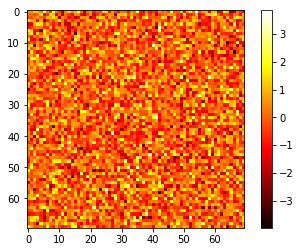

In [54]:
% matplotlib inline
from matplotlib import pylab as plt

image = np.random.randn(70, 70)
# image = np.eye(70)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

In [56]:
elements = [3, 4, 5, 6, 7, 2]
elements2 = [4, 5, 6, 6, 6, 5, 4]

for element, element2 in zip(elements, elements2):
    # print(element, element2)
    print("first is {}, second is '{}'". format(element, element2))
    
print("\n\n")    
    
for i, elements in zip(range(len(elements)), elements):
    print(i, elements)

print('\n')

seasons = ['Spring', 'Summer', 'Fall', 'Winter']
print(list(enumerate(seasons)))  # со списком чисел не сработает

first is 3, second is '4'
first is 4, second is '5'
first is 5, second is '6'
first is 6, second is '6'
first is 7, second is '6'
first is 2, second is '5'



0 3
1 4
2 5
3 6
4 7
5 2


[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
